In [86]:
%matplotlib notebook
import pystan
import matplotlib.pyplot as plt
import seaborn
import numpy as np
import scipy.stats

In [66]:
%matplotlib notebook
import pystan
import matplotlib.pyplot as plt
import seaborn
import numpy as np

code = '''
data {
    int nobs;
    vector[2] y[nobs];
}
parameters {
    vector[2] mu;
    vector[2] sigma;
    real p;
}
transformed parameters {
    matrix[2, 2] cov;
    cov[1, 1] <- sigma[1]*sigma[1];
    cov[2, 2] <- sigma[2]*sigma[2];
    cov[1, 2] <- p*sigma[1]*sigma[2];
    cov[2, 1] <- p*sigma[1]*sigma[2];
}
model {
    mu[1] ~ uniform(-1000, 1000);
    mu[2] ~ uniform(-1000, 1000);
    sigma[1] ~ uniform(0, 1000);
    sigma[2] ~ uniform(0, 1000);
    p ~ uniform(-1, 1);
    y ~ multi_normal(mu, cov);
}
'''
nobs = 100
mu1 = 0.5
s1 = 1.0
mu2 = 1.0
s2 = 0.5
p = 0.8

y = np.random.multivariate_normal([mu1, mu2], cov=[[s1**2, p*s1*s2], 
                                                  [p*s1*s2, s2**2]], size=[nobs])
data = {
    'nobs': nobs,
    'y': y
}
fit = pystan.stan(model_code=code, data=data, iter=1000, chains=4)

/Users/roliveira/anaconda3/lib/python3.5/multiprocessing/reduction.py:50: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  cls(buf, protocol).dump(obj)
/Users/roliveira/anaconda3/lib/python3.5/multiprocessing/reduction.py:50: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  cls(buf, protocol).dump(obj)
/Users/roliveira/anaconda3/lib/python3.5/multiprocessing/reduction.py:50: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  cls(buf, protocol).dump(obj)
/Users/roliveira/anaconda3/lib/python3.5/multiprocessing/reduction.py:50: UserWarning: Pickling fit object

In [67]:
print(fit)

Inference for Stan model: anon_model_62e1f87e01f23387c8b9fdabc8fcab9c.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu[0]      0.46  2.2e-3    0.1   0.27   0.39   0.46   0.53   0.65   2000    1.0
mu[1]      1.02  1.1e-3   0.05   0.92   0.98   1.02   1.05   1.11   2000    1.0
sigma[0]   0.98  1.6e-3   0.07   0.84   0.93   0.97   1.02   1.13   2000   1.01
sigma[1]   0.48  7.8e-4   0.03   0.42   0.45   0.48    0.5   0.55   2000    1.0
p          0.76  1.0e-3   0.04   0.66   0.73   0.76   0.79   0.83   2000    1.0
cov[0,0]   0.96  3.1e-3   0.14   0.71   0.86   0.94   1.04   1.28   2000   1.01
cov[1,0]   0.36  1.4e-3   0.06   0.26   0.31   0.35   0.39    0.5   2000    1.0
cov[0,1]   0.36  1.4e-3   0.06   0.26   0.31   0.35   0.39    0.5   2000    1.0
cov[1,1]   0.23  7.6e-4   0.03   0.17   0.21   0.23   0.25    0.3   2000    1.0
lp__      20.

In [69]:
trace = fit.extract()

In [70]:
trace.keys()

odict_keys(['mu', 'sigma', 'p', 'cov', 'lp__'])

<IPython.core.display.Javascript object>


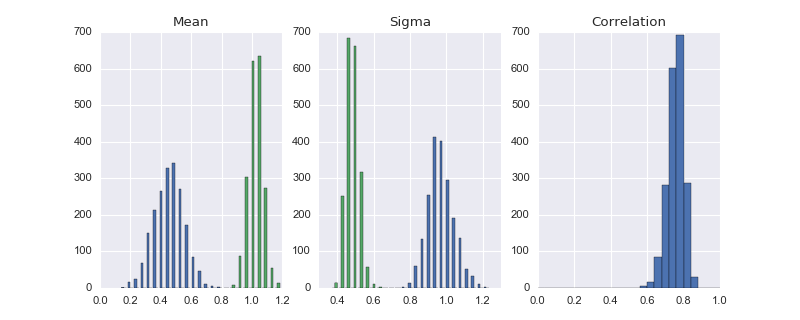

(array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    1.,    0.,    6.,   16.,   84.,  281.,
         601.,  693.,  287.,   31.,    0.,    0.,    0.]),
 array([ 0.  ,  0.04,  0.08,  0.12,  0.16,  0.2 ,  0.24,  0.28,  0.32,
         0.36,  0.4 ,  0.44,  0.48,  0.52,  0.56,  0.6 ,  0.64,  0.68,
         0.72,  0.76,  0.8 ,  0.84,  0.88,  0.92,  0.96,  1.  ]),
 <a list of 25 Patch objects>)

In [97]:
plt.figure(figsize=(10,4))
plt.subplot(1,3,1)
plt.title('Mean')
plt.hist(trace['mu'][:], 25)
plt.subplot(1,3,2)
plt.title('Sigma')
plt.hist(trace['sigma'][:], 25)
plt.subplot(1,3,3)
plt.title('Correlation')
plt.hist(trace['p'][:], 25, range=[0, 1])

In [90]:
sm = pystan.StanModel(model_code=code)
op = sm.optimizing(data=data)
print(op)

In [92]:
op

OrderedDict([('mu', array([ 0.45502153,  1.01317415])),
             ('sigma', array([ 0.95625026,  0.46923887])),
             ('p', array(0.7611483253090853)),
             ('cov', array([[ 0.91441457,  0.34153471],
                     [ 0.34153471,  0.22018512]]))])

In [94]:
scipy.stats.pearsonr(y[:, 0], y[:, 1])
(0.76115113843121229, 3.9148885356144539e-20)

(0.76115113843121229, 3.9148885356144539e-20)